In [1]:
import pandas as pd
import plotly.express as px
from src.utils import try_parameters, estimate_charges


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
medical_df = pd.read_csv('insurance.csv')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Порахувати середнє значення витрат для різних груп, наприклад, курці/некурці або за регіонами.
- Зробити категорії з "хорошими" та "поганими" факторами: наприклад, курці отримують фіксовану надбавку до витрат, некурці — ні. Аналогічно, для регіонів, де середні витрати вищі, додати надбавку, а для інших — зменшити. Далі скласти всі ці надбавки та базову суму для прогнозу.
- Привласнити кожному фактору коефіцієнт (наприклад, курець = 1.5, некурець = 1.0) і помножити базову суму на добуток цих коефіцієнтів.
- Визначити базову суму витрат і додавати/віднімати фіксовані значення для кожного фактора, наприклад, за кожну дитину додати 500, за високий ІМТ — ще 1000.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [3]:
fig = px.histogram(medical_df, x='charges', color='sex', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл charges за категорією sex в наборі даних правоскошений. До 50 персентиля кількість чоловіків майже та сама що і жінок, тобто розподіл між чоловіками і жінками подібний у нижчому діапазоні витрат, але вищі витрати переважають у чоловіків.

In [4]:
fig = px.histogram(medical_df, x='charges', color='region', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл даних також правоскошений. Найвищі витрати спостерігаються серед жителів southeast та northeast. Розподіл даних серед southwest і northwest дещо схожий. Медіана у всіх умовно кажучи схожа, тобто 50% жителів незалежно від регіону платять подібну ціну. 50% ж жителів - ціни різні, тому це суттєвий показних, який потрібно враховувати.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [5]:
fig = px.histogram(medical_df, x='region', color='smoker', title='Region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
- Розподіл не курящих ріаномірний серед регіонів
- Кількість курящих дещо вища у southwest, якщо charges для курящих більший (а так і є згідно розподілу в уроці) потрібно взяти це до уваги.

In [6]:
fig = px.histogram(medical_df, x='children', color='smoker', title='Region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
- Кількість не курящих відносно курящих з тою самою кількістю дітей завжди значно більша.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [7]:
fig = px.violin(medical_df, x='charges', color='children', title='Charges vs Children')
fig.show()

**Спостереження**
- Витрати виглядають подібними незалежно від кількості дітей, хоча для категорій із 3 або більше дітей спостерігається більше варіацій у середніх і високих витратах

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [8]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

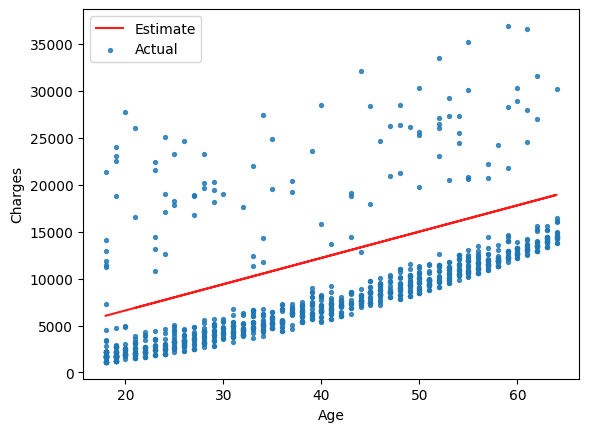

In [9]:
w_1, b_1 = 280, 1000
try_parameters(non_smoker_df, w_1, b_1)

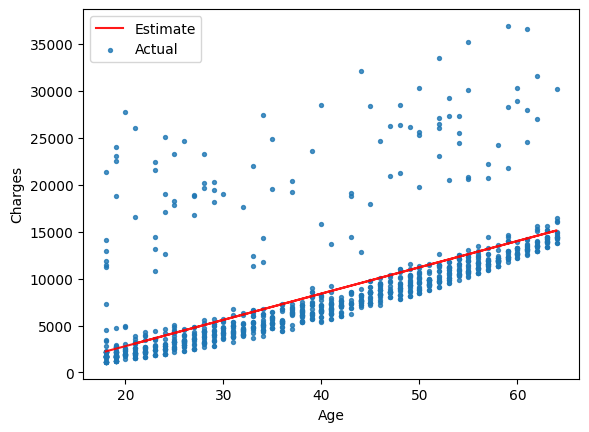

In [10]:
w_2, b_2 = 280, -2800
try_parameters(non_smoker_df, w_2, b_2)

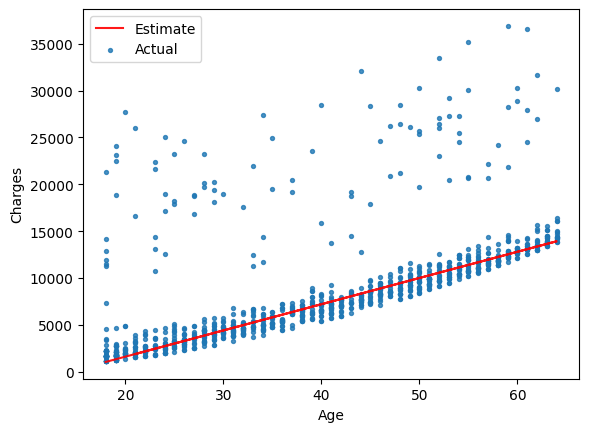

In [11]:
w_3, b_3 = 280, -4000
try_parameters(non_smoker_df, w_3, b_3)

**Висновок**
- Якби не було викидів можна було б провести лінію по середтні (останній графік)
- Враховуючи викиди, перше, що прийшло в голову - це те, що вони можуть зсунути лінію у свій бік відповідно. Проте їх не багато у порівнянні з основною кількістю даних, тому лінія не значно піднялась.
- Ще припущення, що ці викиди - це результат впливу інших параметрів (наприклад багато дітей, тому ціна значно більша), тому, можливо, в моделі потрібно враховувати і іншу змінну, щоб точніше провести лінію.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [12]:
from src.utils import root_mean_sqrt_error

In [13]:
ages = non_smoker_df.age
target = non_smoker_df.charges

estimated_charges_1 = estimate_charges(ages, w_1, b_1)
estimated_charges_2 = estimate_charges(ages, w_2, b_2)
estimated_charges_3 = estimate_charges(ages, w_3, b_3)


rmse_1 = root_mean_sqrt_error(target, estimated_charges_1)
rmse_2 = root_mean_sqrt_error(target, estimated_charges_2)
rmse_3 = root_mean_sqrt_error(target, estimated_charges_3)

print(f"RMSE 1: {rmse_1:.2f}")
print(f"RMSE 2: {rmse_2:.2f}")
print(f"RMSE 3: {rmse_3:.2f}")

RMSE 1: 5889.43
RMSE 2: 4670.52
RMSE 3: 4873.30


**Висновок**

- Найменше значення вдалось досягнути: 4670.52
- Стратегія у мене була проста: спочатку направити лінію у напрямку тренду, тоді підбирати b щоб провести лінію згідно основних даних, після цього пробувати комбінації w, b у різні сторони, чи зменшує це rmse.